In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
torch.manual_seed(1234)
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the training data and changing the labels

train_data = pd.read_csv('HeartDisease.csv')
train_data = train_data.as_matrix()

train_x = train_data[:,:13]
train_y = train_data[:,13]

print(train_y)

    



     



[0. 2. 1. 0. 0. 0. 3. 0. 2. 1. 0. 0. 2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 3.
 4. 0. 0. 0. 0. 3. 0. 2. 1. 0. 0. 0. 3. 1. 3. 0. 4. 0. 0. 0. 1. 4. 0. 4.
 0. 0. 0. 0. 2. 0. 1. 1. 1. 1. 0. 0. 2. 0. 1. 0. 2. 2. 1. 0. 2. 1. 0. 3.
 1. 1. 1. 0. 1. 0. 0. 3. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 1. 2.
 3. 0. 0. 0. 0. 0. 0. 3. 0. 2. 1. 2. 3. 1. 1. 0. 2. 2. 0. 0. 0. 3. 2. 3.
 4. 0. 3. 1. 0. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 4. 3. 1. 0. 0. 1. 0. 1. 0.
 1. 4. 0. 0. 0. 0. 0. 0. 4. 3. 1. 1. 1. 2. 0. 0. 4. 0. 0. 0. 0. 0. 1. 0.
 3. 0. 1. 0. 4. 1. 0. 1. 0. 0. 3. 2. 0. 0. 1. 0. 0. 2. 1. 2. 0. 3. 2. 0.
 3. 0. 0. 0. 1. 0. 0. 0. 0. 0. 3. 3. 3. 0. 1. 0. 4. 0. 3. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 3. 1. 0. 0. 0. 3. 2. 0. 2. 1. 0. 0. 3. 2. 1. 0. 0. 0. 0. 0.
 2. 0. 2. 2. 1. 3. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3. 0. 0. 4. 2. 2.
 1. 0. 1. 0. 2. 0. 1. 0. 0. 0. 1. 0. 2. 0. 3. 0. 2. 4. 2. 0. 0. 1. 0. 2.
 2. 1. 0. 3. 1. 1. 2. 3. 1.]


c:\python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [3]:
# helping function
def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()

In [15]:
# Parameters 

h1 = 30
h2 = 15
lr = 0.001
num_epochs = 500

# MLP Model 

class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(13,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,5)
        
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        
        
        return x
    
net = Net()


In [16]:
# Loss function and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(),lr=lr)

c:\python\lib\site-packages\ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
c:\python\lib\site-packages\ipykernel_launcher.py:24: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


 Epoch [1/500] Loss : 23.2025
 Epoch [11/500] Loss : 4.4287
 Epoch [21/500] Loss : 2.4919
 Epoch [31/500] Loss : 3.0033
 Epoch [41/500] Loss : 1.8696
 Epoch [51/500] Loss : 2.0255
 Epoch [61/500] Loss : 1.5168
 Epoch [71/500] Loss : 1.4861
 Epoch [81/500] Loss : 1.3792
 Epoch [91/500] Loss : 1.3206
 Epoch [101/500] Loss : 1.2795
 Epoch [111/500] Loss : 1.2499
 Epoch [121/500] Loss : 1.2280
 Epoch [131/500] Loss : 1.2115
 Epoch [141/500] Loss : 1.1988
 Epoch [151/500] Loss : 1.1890
 Epoch [161/500] Loss : 1.1815
 Epoch [171/500] Loss : 1.1758
 Epoch [181/500] Loss : 1.1712
 Epoch [191/500] Loss : 1.1674
 Epoch [201/500] Loss : 1.1644
 Epoch [211/500] Loss : 1.1617
 Epoch [221/500] Loss : 1.1596
 Epoch [231/500] Loss : 1.1577
 Epoch [241/500] Loss : 1.1562
 Epoch [251/500] Loss : 1.1548
 Epoch [261/500] Loss : 1.1538
 Epoch [271/500] Loss : 1.1529
 Epoch [281/500] Loss : 1.1523
 Epoch [291/500] Loss : 1.1518
 Epoch [301/500] Loss : 1.1515
 Epoch [311/500] Loss : 1.1514
 Epoch [321/500] L

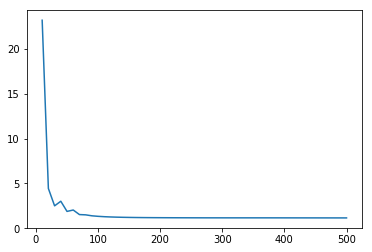

In [17]:
# Training the network

counter =[]
loss_history =[]
iteration_number = 0


for epoch in range(num_epochs):
    
    X = Variable(torch.Tensor(train_x).float())
    Y = Variable(torch.Tensor(train_y).long())
    
    optimizer.zero_grad()
    out = net(X)
    
    loss = criterion(out,Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 ==0:
        iteration_number+=10
        print(' Epoch [%d/%d] Loss : %.4f' %(epoch+1,num_epochs,loss.data[0]))
        counter.append(iteration_number)
        loss_history.append(loss.data[0])

show_plot(counter,loss_history)

In [18]:
## Testing the model 

X = Variable(torch.Tensor(train_x).float())
Y = torch.Tensor(train_y).long()

out = net(X)

_,predicted = torch.max(out.data,1)

# get accuracy

print('Accuracy of the network %d %%' %(100*torch.sum(Y==predicted)/297))

Accuracy of the network 55 %


In [30]:
X = [19,1,1,1,1,1,1,11,1,1,1,1,1]
X = Variable(torch.Tensor(X).float())
def pred(input_variable):
    
    out = net(input_variable)
    
    stage = 0
    stage_class=0
    for pos in range (5):
        if out[pos]>stage:
             
            stage_class = pos
            stage = out[pos]
    return stage_class

predicted = pred(X)
print(predicted)


0
